# Task-03

## Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

## Dataset used: The Bank Marketing dataset from the UCI Machine Learning Repository
## Description: 
The Bank Marketing dataset from the UCI Machine Learning Repository is a widely used dataset for marketing and customer behavior analysis. It comprises information related to a bank's marketing campaign, specifically phone calls made to clients to encourage them to subscribe to a term deposit. This dataset includes a mix of numerical and categorical attributes, covering client details (such as age, job, and education), campaign-related information (number and duration of calls), and economic indicators. The primary target variable is binary, indicating whether the client subscribed to the term deposit or not. Typically, it contains several thousand instances and is frequently employed for classification tasks to predict client subscription outcomes, making it a valuable resource for studying banking customer behavior and marketing strategies.


In [1]:
#importing the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

In [2]:
#Loading the train data and viewing first few rows
train = pd.read_csv("C:/Users/CHARAN/Downloads/train.csv")
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [3]:
#Loading the test data and viewing first few rows
test = pd.read_csv("C:/Users/CHARAN/Downloads/test.csv")
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


## Performing some basic EDA



In [4]:
#Checking the dimension of the training dataset:
print("The total rows in the training dataset is:" ,train.shape[0] ,"\nThe total columns in the training dataset is:" ,train.shape[1])

The total rows in the training dataset is: 31647 
The total columns in the training dataset is: 18


In [5]:
#Checking the dimension of the testing dataset:
print("The total rows in the test dataset is:" ,test.shape[0] ,"\nThe total columns in the test dataset is:" ,test.shape[1])

The total rows in the test dataset is: 13564 
The total columns in the test dataset is: 17


In [6]:
#Checking the missing column in the test dataset.
def check_column_similarity(data1, data2):
    if len(data1.columns)==len(data2.columns):
        print('Both train and test has same columns')
    else:
        print("Column length is different.")
        if len(data1.columns) > len(data2.columns):
            print(set(data1.columns)-set(data2.columns))
        else:
            print(set(data2.columns)-set(data1.columns))
        

In [7]:
check_column_similarity(train, test)

Column length is different.
{'subscribed'}


In [8]:
# Checking the type of data and the missing value
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [9]:
train.dtypes.value_counts()

object    10
int64      8
dtype: int64

In [10]:
#checking for missing values
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [11]:
# Descriptive Statistical Analysis:
train.describe( include='all')

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647,31647,31647,31647,31647.000000,31647,31647,31647,31647.000000,31647,31647.000000,31647.000000,31647.000000,31647.000000,31647,31647
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,6842,19095,16224,31062,NaN,17584,26516,20423,NaN,9669,NaN,NaN,NaN,NaN,25929,27932
mean,22563.972162,40.957247,NaN,NaN,NaN,NaN,1363.890258,NaN,NaN,NaN,15.835466,NaN,258.113534,2.765697,39.576042,0.574272,NaN,NaN
std,13075.936990,10.625134,NaN,NaN,NaN,NaN,3028.304293,NaN,NaN,NaN,8.337097,NaN,257.118973,3.113830,99.317592,2.422529,NaN,NaN
min,2.000000,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,11218.000000,33.000000,NaN,NaN,NaN,NaN,73.000000,NaN,NaN,NaN,8.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,22519.000000,39.000000,NaN,NaN,NaN,NaN,450.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,33879.500000,48.000000,NaN,NaN,NaN,NaN,1431.000000,NaN,NaN,NaN,21.000000,NaN,318.500000,3.000000,-1.000000,0.000000,NaN,NaN


<AxesSubplot:xlabel='subscribed', ylabel='count'>

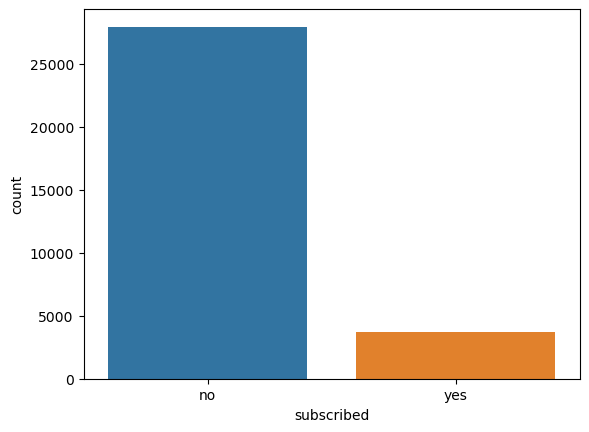

In [12]:
# Plotting the 'subscribed' frequency
sns.countplot(data=train, x='subscribed')

<AxesSubplot:xlabel='subscribed', ylabel='count'>

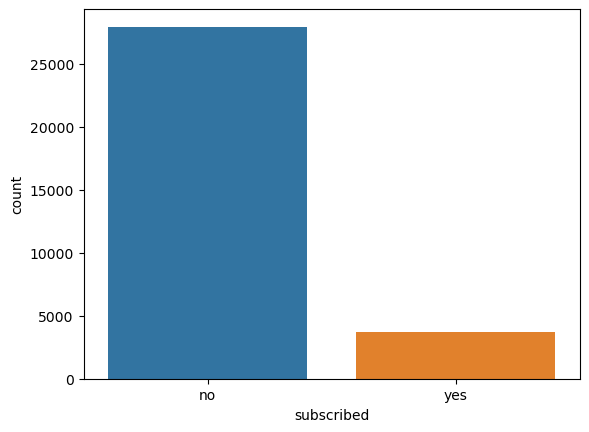

In [13]:
# Plotting the 'subscribed' frequency
sns.countplot(data=train, x='subscribed')

### Observation:
- The total rows and columns in the training dataset are 31647 and : 1 respectively.
- 'subscribed' is our target column ,we have to predict if the client will subscribe (yes/no) to a term deposit.-
- Out of 18 features in the dataset , 10 are categorical and 8 numerical features.
- There is no missing value in the dataset.
- We can see that only 3,715 people out of 31,647 have subscribed which is roughly 12%. The dataset is highly imbalanced..

## Exploring the non-numeric features

In [14]:
#Selecting the non-numerical columns:
print("The non-numerical columns are: ")
data_non_numerical=train.select_dtypes(object)
data_non_numerical

The non-numerical columns are: 


,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
0,admin.,married,unknown,no,no,no,telephone,nov,unknown,no
1,unknown,married,secondary,no,no,no,cellular,jul,unknown,no
2,services,married,secondary,no,yes,no,cellular,jul,unknown,no
3,management,divorced,tertiary,no,no,no,cellular,jun,success,yes
4,technician,married,secondary,no,yes,no,cellular,feb,unknown,no
...,...,...,...,...,...,...,...,...,...,...
31642,management,single,tertiary,no,yes,no,cellular,may,unknown,no
31643,management,divorced,tertiary,no,no,yes,cellular,jun,unknown,yes
31644,management,single,tertiary,no,no,no,cellular,aug,unknown,no
31645,technician,married,secondary,no,yes,no,telephone,may,failure,no


### Visualizing Categorical columns  
- Heatmap
- Barplot
 

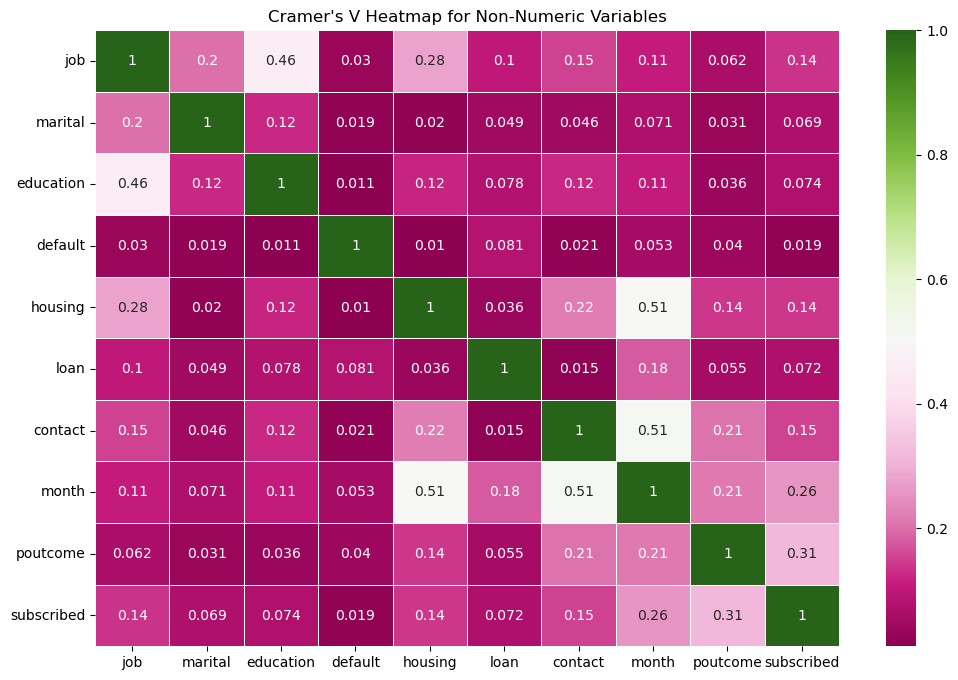

In [15]:
# Create a function to calculate Cramer's V statistic
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Create a matrix of Cramer's V values between variables
columns = data_non_numerical.columns
cramer_matrix = pd.DataFrame(index=columns, columns=columns)
for col1 in columns:
    for col2 in columns:
        cramer_matrix.loc[col1, col2] = cramers_v(data_non_numerical[col1], data_non_numerical[col2])

# Create a heatmap from the Cramer's V matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cramer_matrix.astype(float), annot=True, cmap="PiYG" ,linewidth=.5)

plt.title("Cramer's V Heatmap for Non-Numeric Variables")
plt.show()

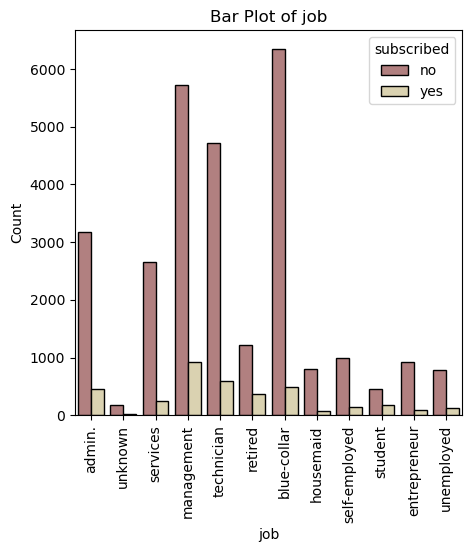

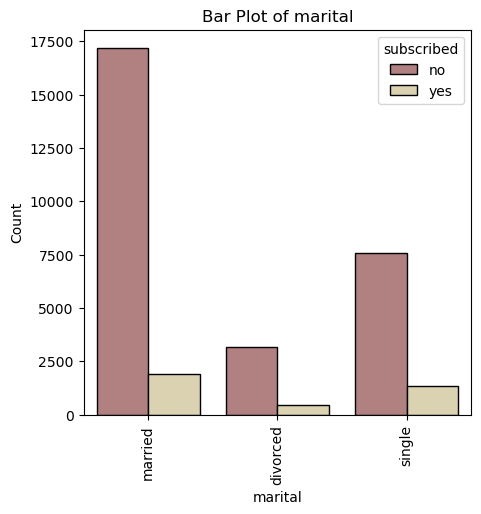

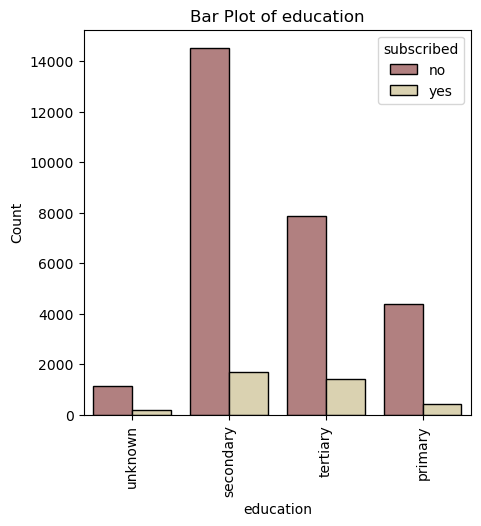

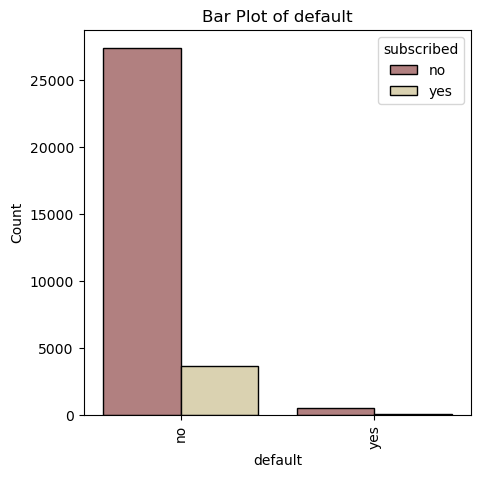

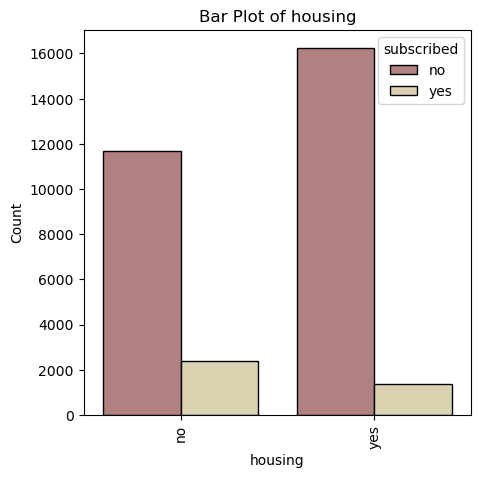

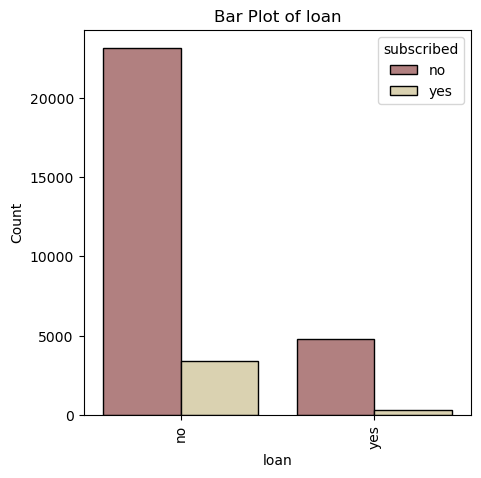

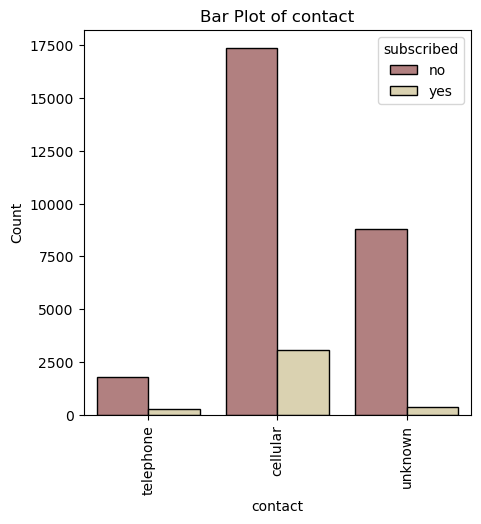

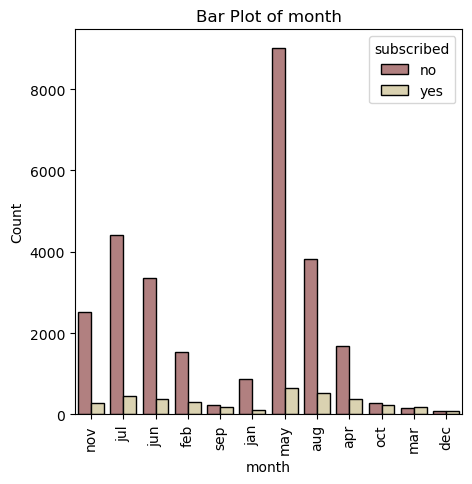

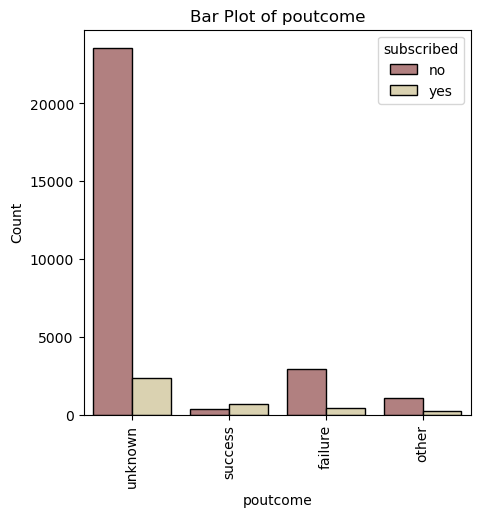

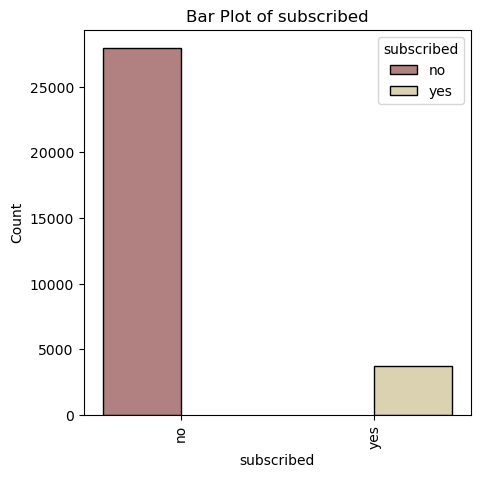

In [16]:
# using barplot
for feature in data_non_numerical:
    plt.figure(figsize=(5, 5))
    sns.countplot(x=feature, data=data_non_numerical, palette='pink', hue="subscribed", edgecolor = "black") 
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

### Observation:

- We used Cramer's V statistic in a heatmap to analyze the non-numerical variables. We found that the variable `'poutcome'` has a strong correlation with the target variable `'subscribed'`, with a coefficient of 0.31, and the target variable is least dependent on the feature `'marital'`.
- The majority of clients hold the occupation of `'management'` based on the `Job` column.
- Most of the people who are contacted are married.
- Most of the people who are contacted have secondary education.
- Very few clients are contacted who are defaulters.
- Fewer clients are contacted who have loans.
- Most of the people are contacted through cellular.
- Most of the clients are contacted in the month of May.
- Most of the clients contacted have the previous `'poutcome'` as `'unknown'`.


## Performing Correlation to understand the important numerical features in the dataset:

### Converting the dtype of the target variable from object to integer so that we can perform correlation. 

In [17]:
# Converting the target variables into 0s and 1s
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)
train['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [18]:
#Selecting the numerical columns:
print("The Numerical columns are: ")
data_numerical=train.select_dtypes(np.number)
data_numerical

The Numerical columns are: 


,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
0,26110,56,1933,19,44,2,-1,0,0
1,40576,31,3,20,91,2,-1,0,0
2,15320,27,891,18,240,1,-1,0,0
3,43962,57,3287,22,867,1,84,3,1
4,29842,31,119,4,380,1,-1,0,0
...,...,...,...,...,...,...,...,...,...
31642,36483,29,0,12,116,2,-1,0,0
31643,40178,53,380,5,438,2,-1,0,1
31644,19710,32,312,7,37,3,-1,0,0
31645,38556,57,225,15,22,7,337,12,0


In [19]:
#  Correlation matrix (for continuous variables)
correlation_matrix = data_numerical.corr()
correlation_matrix

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


### Visualizing the correlation with heatmap
 A heatmap can show the correlations between numerical variables.

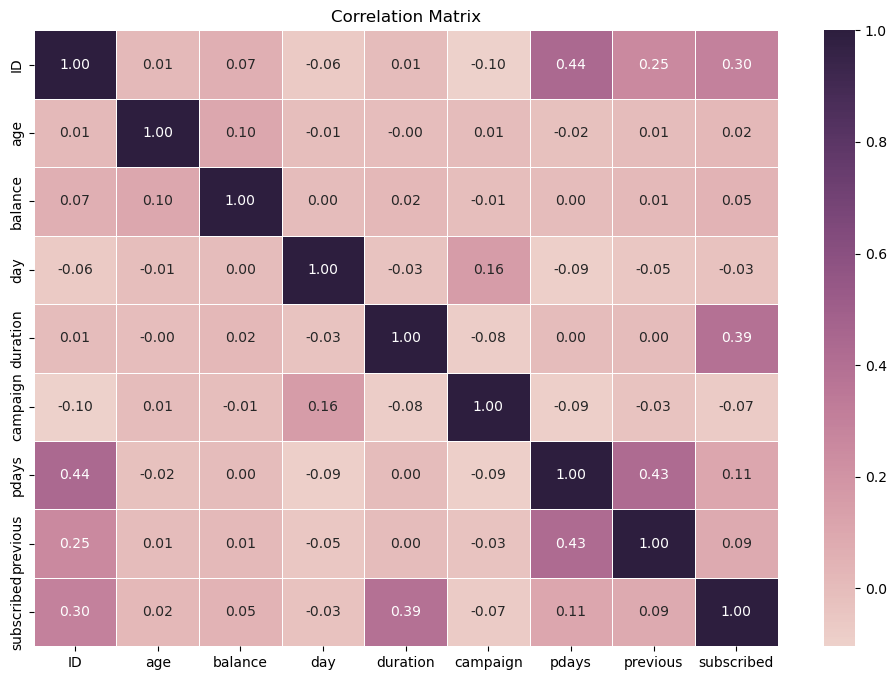

In [20]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt=".2f",linewidth=.5)
plt.title('Correlation Matrix')
plt.show()

### Observation
- From the correlation matrix the attribute 'duration' and 'pdays' seems to be important features.
- The attribute 'day' and 'age' seems to be the least important features. 


## Model Building

In [21]:
target = train['subscribed']
train = train.drop(['subscribed', "ID"], axis=1)

In [22]:
# Create dummy variables for categorical features
for column in train.select_dtypes(include='object'):
    train = pd.get_dummies(train, columns=[column], dtype='int')
train.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,56,1933,19,44,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,31,3,20,91,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,27,891,18,240,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,57,3287,22,867,1,84,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,31,119,4,380,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [27]:
#target = train['subscribed']
#train = train.drop(['subscribed', "ID"], axis=1)

In [24]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=12)

### Logistic Regression

In [25]:
#creating an object of logistic regression model
lreg = LogisticRegression()
#fitting the data into the model
lreg.fit(X_train,y_train)

LogisticRegression()

In [26]:
#Making predictions on the validation set
pred = lreg.predict(X_val)
#Calculating the accuracy score
accuracy_score(y_val,pred)

0.8919431279620853

### Decision Tree

In [28]:
#creating an object of Decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
#fitting the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [29]:
#making predictions on the validation set
predict = clf.predict(X_val)
predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [30]:
#Calculating the accuracy
accuracy_score(y_val,predict)

0.8947867298578199

In [31]:
clf = DecisionTreeClassifier()
y_predict = clf.fit(X_train, y_train).predict(X_val)

In [32]:
print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5608
           1       0.45      0.49      0.47       722

    accuracy                           0.87      6330
   macro avg       0.69      0.71      0.70      6330
weighted avg       0.88      0.87      0.88      6330



In [33]:
print(confusion_matrix(y_val, y_predict, labels=clf.classes_))

[[5176  432]
 [ 368  354]]


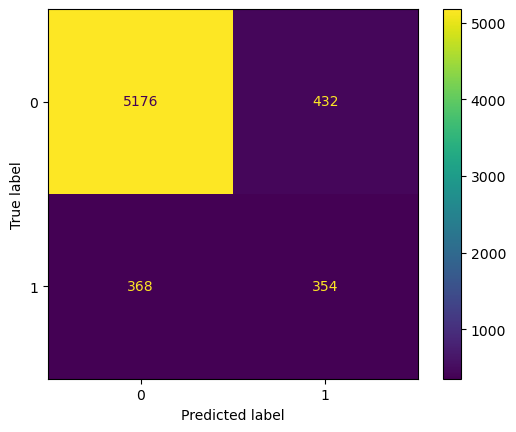

In [34]:
# Create the confusion matrix
cm = confusion_matrix(y_val, y_predict, labels=clf.classes_)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()

Text(0.5, 1.0, 'Top 20 Features')

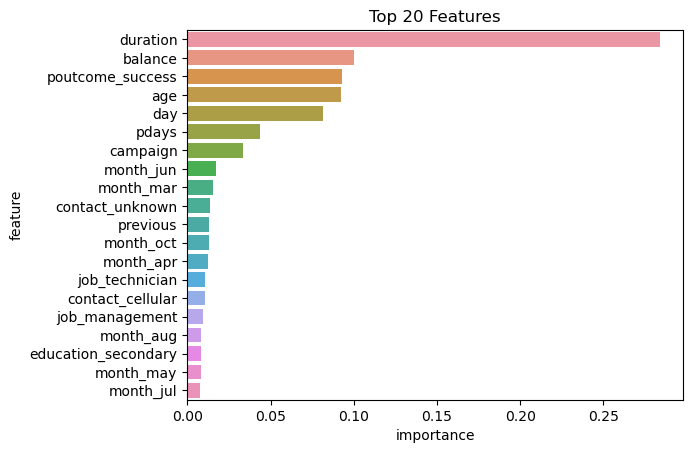

In [35]:
fi = pd.DataFrame({"feature":X_train.columns.to_list(), "importance": clf.feature_importances_}).sort_values(by="importance", ascending=False)
sns.barplot(x="importance", y="feature", data=fi.head(20))
plt.title("Top 20 Features")

## Observations:

- It was a great learning experience working on a financial dataset.

- Our dataset consists of categorical and numerical features.

- We have 17 independent features, out of which only half of them are important.

- 'duration' is the most important feature, while 'education' is the least important feature.

- The month of May has seen the highest number of clients contacted.
  
- We compare two models Logistic regression and decision tree where decision tree outperfroms Logistic regression with accuracy 0.8947  and f1 score 0.88.
   
- Also we plotted the feature importance where the top five features are:duration, balance, poutcome_success,  age and day.